In [3]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

# File to Load (Remember to Change These)
file_to_load = "name_clean.csv"

# Read Name File and store into Pandas data frame
name_df = pd.read_csv(file_to_load)
del name_df['Unnamed: 0']
name_df.head()

,decades,state,gender,name,number
0,10s,AK,F,Mary,189
1,10s,AK,F,Margaret,92
2,10s,AK,F,Helen,89
3,10s,AK,F,Annie,53
4,10s,AK,F,Anna,52


### Top Names of all time, all states, all genders, all decades

In [4]:
top_names = name_df.groupby('name').sum().sort_values(by='number', ascending=False)
top_x = top_names.head(30).reset_index()
top_x

,name,number
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134
5,Mary,3750838
6,David,3605910
7,Richard,2544867
8,Joseph,2528437
9,Charles,2280600


In [5]:
x_values = [top_x['name'].values[x] for x in range(len(top_x))]
y_values = [top_x['number'].values[x] for x in range(len(top_x))]
color = ['skyblue','skyblue','skyblue','skyblue','skyblue','red','skyblue','skyblue','skyblue','skyblue']

In [6]:
test_dict = {}
for index, row in top_x.iterrows():
    test_dict[row['name']] = row['number']
print(test_dict)
    

{'James': 5015584, 'John': 4885284, 'Robert': 4749154, 'Michael': 4366524, 'William': 3901134, 'Mary': 3750838, 'David': 3605910, 'Richard': 2544867, 'Joseph': 2528437, 'Charles': 2280600, 'Thomas': 2248729, 'Christopher': 2032748, 'Daniel': 1907079, 'Matthew': 1599015, 'Patricia': 1571187, 'Elizabeth': 1539318, 'Jennifer': 1469039, 'Linda': 1449706, 'Anthony': 1434838, 'Barbara': 1425792, 'Donald': 1405933, 'Paul': 1365207, 'Mark': 1349517, 'George': 1337505, 'Steven': 1281785, 'Andrew': 1274681, 'Kenneth': 1269410, 'Edward': 1222756, 'Joshua': 1209642, 'Kevin': 1171295}


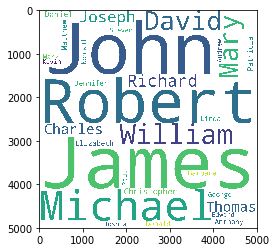

In [7]:


wc = WordCloud(background_color="white",width=5000,height=5000, max_words=len(test_dict),relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(test_dict)
plt.imshow(wc)


Text(0.5, 0, 'Names')

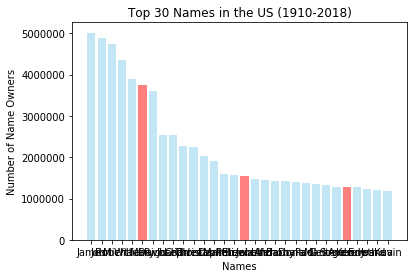

In [8]:
plt.bar(x_values, y_values, color=color, alpha=0.5, align="center")
# Incorporate the other graph properties
plt.title(f"Top {len(top_x)} Names in the US (1910-2018)")
plt.ylabel("Number of Name Owners")
plt.xlabel("Names")


In [9]:
# Start with one review:
#text = top_x

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)

# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [10]:
test = [top_x['name'].values[i] for i in range(len(top_x))]
test
abc  = top_x.head(5)
abc

,name,number
0,James,5015584
1,John,4885284
2,Robert,4749154
3,Michael,4366524
4,William,3901134


### Top Names of all time, all states

In [11]:
name_df2 = name_df.groupby(['gender','name']).sum().reset_index()
top_x_gender = name_df2.groupby(['gender'], as_index=False).apply(lambda x: x.nlargest(5, 'number'))
top_x_gender_fin = top_x_gender.reset_index()[top_x_gender.columns[0:6]]
top_x_gender_fin

,gender,name,number
0,F,Mary,3741196
1,F,Patricia,1569022
2,F,Elizabeth,1537684
3,F,Jennifer,1466161
4,F,Linda,1447943
5,M,James,4997327
6,M,John,4869607
7,M,Robert,4734038
8,M,Michael,4349307
9,M,William,3890923


### Top Names by Decade by Gender

In [12]:
name_df3 = name_df.groupby(['decades','gender','name']).sum().reset_index()
name_df3
top_x_decade = name_df3.groupby(['decades','gender'], as_index=False).apply(lambda x: x.nlargest(5, 'number'))
top_x_decade_fin = top_x_decade.reset_index()[top_x_decade.columns[0:6]]
top_x_decade_fin.head()

,decades,gender,name,number
0,00s,F,Emily,223690
1,00s,F,Madison,193152
2,00s,F,Emma,181257
3,00s,F,Olivia,156000
4,00s,F,Hannah,155698


### Top Name By Decade, By State (F)

In [13]:
female_df = name_df.loc[name_df['gender']=='F',:].groupby(['decades','state','name']).sum().reset_index()
female_df
top_f_decadexstate = female_df.groupby(['decades','state'], as_index=False).apply(lambda x: x.nlargest(1, 'number'))
top_f_decadexstate_fin = top_f_decadexstate.reset_index()[top_f_decadexstate.columns[0:6]]
top_f_decadexstate

,,decades,state,name,number
0,301,00s,AK,Madison,462
1,1598,00s,AL,Madison,3831
2,2975,00s,AR,Madison,2526
3,4130,00s,AZ,Emily,4171
4,7985,00s,CA,Emily,30408
5,13723,00s,CO,Emily,3052
6,15353,00s,CT,Emily,2684
7,16414,00s,DC,Katherine,460
8,17018,00s,DE,Madison,662
9,18785,00s,FL,Isabella,11981


In [14]:
male_df = name_df.loc[name_df['gender']=='M',:].groupby(['decades','state','name']).sum().reset_index()
male_df
top_f_decadexstate = male_df.groupby(['decades','state'], as_index=False).apply(lambda x: x.nlargest(1, 'number'))
top_f_decadexstate_fin = top_f_decadexstate.reset_index()[top_f_decadexstate.columns[0:6]]
top_f_decadexstate

,,decades,state,name,number
0,184,00s,AK,Jacob,590
1,1681,00s,AL,William,5902
2,2161,00s,AR,Jacob,2695
3,3418,00s,AZ,Jacob,5986
4,5363,00s,CA,Daniel,39600
5,9811,00s,CO,Jacob,4210
6,11159,00s,CT,Michael,3903
7,11941,00s,DC,William,1009
8,12246,00s,DE,Michael,915
9,14468,00s,FL,Michael,15180


In [15]:
male_df = name_df.loc[name_df['gender']=='M',:].groupby(['state','name']).sum().reset_index()
male_df
top_f_decadexstate = male_df.groupby(['state'], as_index=False).apply(lambda x: x.nlargest(1, 'number'))
top_f_decadexstate_fin = top_f_decadexstate.reset_index()[top_f_decadexstate.columns[0:6]]
top_f_decadexstate

,,state,name,number
0,507,AK,Michael,8212
1,2057,AL,James,158003
2,4618,AR,James,85296
3,7378,AZ,Michael,45937
4,13478,CA,Michael,428770
5,17654,CO,Michael,49208
6,19079,CT,John,79963
7,20500,DC,John,34380
8,21554,DE,John,15269
9,25165,FL,Michael,143444
